In [3]:
!pip install pygam

from pygam import PoissonGAM, s, te
from pygam.datasets import chicago

X, y = chicago(return_X_y=True)
gam = PoissonGAM(s(0, n_splines=200) + te(3, 1) + s(2)).fit(X, y)
print(X)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 620.4 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 16.1 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
[[-2.55650000e+03  3.15000000e+01 -7.43354430e+00 -1.95923379e+01]
 [-2.55450000e+03  3.30000000e+01 -8.26530612e-01 -2.02173379e+01]
 [-2.55350000e+03  2.90000000e+01  5.56645570e+00 -1.96756712e+01]
 ...
 [ 2.55450000e+03  2.10000000e+01 -3.12394366e+00 -6.03620096e+00]
 [ 2.55550000e+03  2.70000000e+01 -2.61239437e+01 -5.98700964e-01]
 [ 2.55650000e+03  1.60000000e+01 -2.51239437e+01 -4.89036763e+00]]


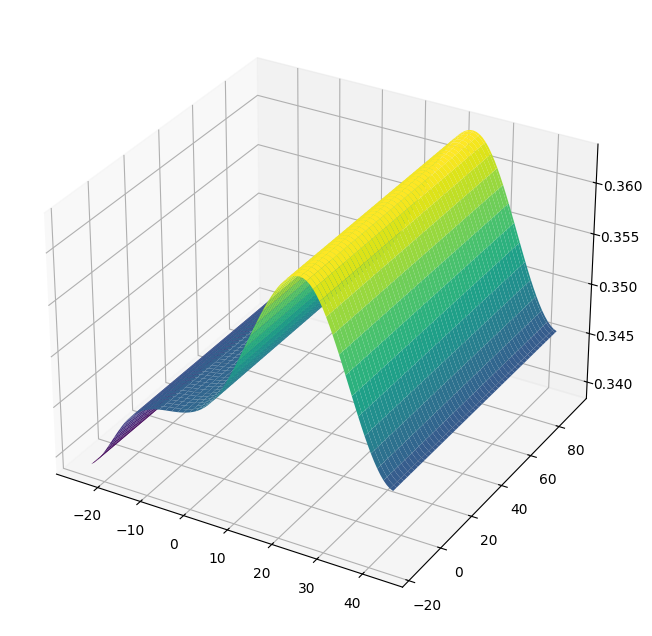

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

plt.ion()
plt.rcParams['figure.figsize'] = (12, 8)
XX = gam.generate_X_grid(term=1, meshgrid=True)
Z = gam.partial_dependence(term=2, X=XX, meshgrid=True)

ax = plt.axes(projection='3d')
ax.plot_surface(XX[0], XX[1], Z, cmap='viridis')

In [6]:
from pygam import LinearGAM, s
from pygam.datasets import toy_interaction

X, y = toy_interaction(return_X_y=True)
gam = LinearGAM(s(0, by=1)).fit(X, y)
gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     20.8493
Link Function:                     IdentityLink Log Likelihood:                              -2341121.4367
Number of Samples:                        50000 AIC:                                          4682286.5721
                                                AICc:                                         4682286.5921
                                                GCV:                                                0.0099
                                                Scale:                                              0.0099
                                                Pseudo R-Squared:                                   0.9976
Feature Function                  Lam

<ipython-input-6-68803672db59>:6: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()


100% (11 of 11) |########################| Elapsed Time: 0:00:01 Time:  0:00:01


[ 53.1205114   99.77681713 111.72416178 ...  70.60725438  92.57124761
 104.77865877]


<Figure size 1200x800 with 0 Axes>

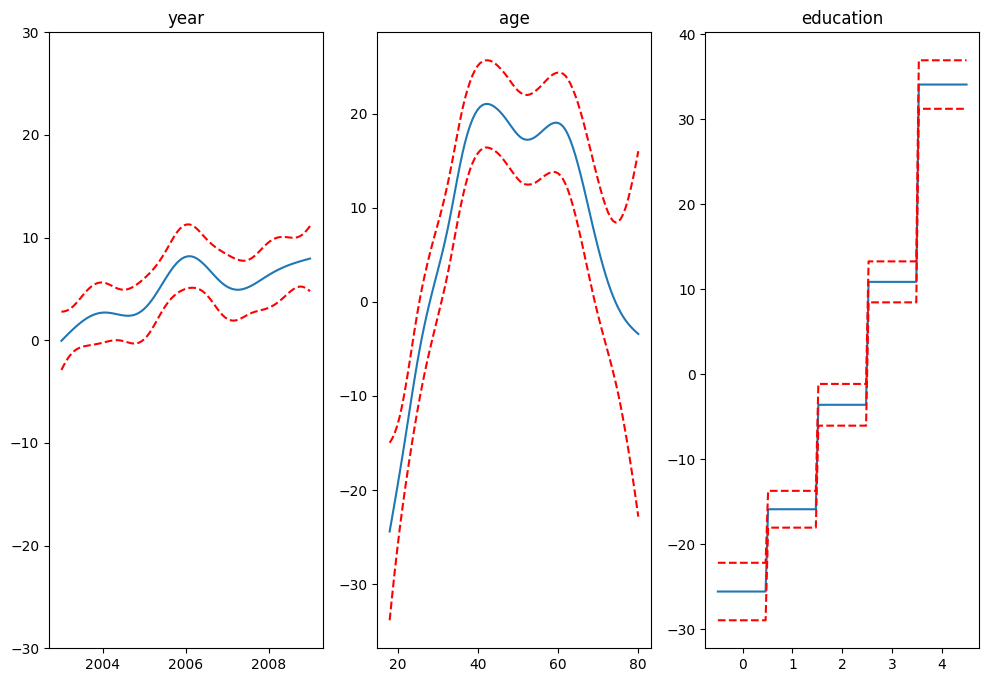

In [8]:
from pygam import LinearGAM, s, f
from pygam.datasets import wage

X, y = wage(return_X_y=True)

## model
gam = LinearGAM(s(0) + s(1) + f(2))
gam.gridsearch(X, y)


## plotting
plt.figure();
fig, axs = plt.subplots(1,3);

titles = ['year', 'age', 'education']
for i, ax in enumerate(axs):
    XX = gam.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
    if i == 0:
        ax.set_ylim(-30,30)
    ax.set_title(titles[i]);

prd = gam.predict(X)
print(prd)

In [9]:
import numpy as np
import statsmodels.api as sm
from statsmodels.gam.api import GLMGam, BSplines
from statsmodels.gam.tests.test_penalized import df_autos

x_spline = df_autos[['weight', 'hp']]
bs = BSplines(x_spline, df=[12, 12], degree=[3, 3])

alpha = np.array([21833888.8, 6460.38479])
gam_bs = GLMGam.from_formula('city_mpg ~ fuel + drive', data=df_autos,
                            smoother=bs, alpha=alpha)
res_bs = gam_bs.fit()
print(res_bs.summary())
aa = gam_bs.select_penweight()[0]

gam_bs = GLMGam.from_formula('city_mpg ~ fuel + drive', data=df_autos,
                            smoother=bs, alpha=aa)
res_bs = gam_bs.fit()
print(res_bs.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               city_mpg   No. Observations:                  203
Model:                         GLMGam   Df Residuals:                   188.93
Model Family:                Gaussian   Df Model:                        13.07
Link Function:               Identity   Scale:                          4.8440
Method:                         PIRLS   Log-Likelihood:                -440.89
Date:                Mon, 18 Nov 2024   Deviance:                       915.18
Time:                        22:44:54   Pearson chi2:                     915.
No. Iterations:                     3   Pseudo R-squ. (CS):             0.9996
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       51.9973      1.989     26.147   